In [91]:
from skimage.metrics import mean_squared_error, structural_similarity
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import pandas as pd

### Baked VAE in SD

In [92]:
img_dir = "baked VAE/png/"
imgs = os.listdir(img_dir)
print(imgs)

['01.png', '02.png', '03.png', '04.png', '05.png', '06.png', '07.png', '08.png', '09.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png']


In [93]:
mse_consecutive, mse_accumulated, fid_consecutive, ssim_consecutive, ssim_accumulated, fid_accumulated = [], [], [], [], [], []

original = Image.open(img_dir + imgs[0])
original = original.convert('RGB')
array_original = np.array(original)
image_original_gray = np.array(original.convert('L'))

for i in range(len(imgs)-1):
    image1 = Image.open(img_dir + imgs[i])
    image2 = Image.open(img_dir + imgs[i+1])
    image1 = image1.convert('RGB')
    image2 = image2.convert('RGB')

    array1 = np.array(image1)
    array2 = np.array(image2)
    image1_gray = np.array(image1.convert('L'))
    image2_gray = np.array(image2.convert('L'))

    mse = mean_squared_error(array1, array2)
    ssim = structural_similarity(image1_gray, image2_gray, data_range=image2_gray.max() - image2_gray.min())
    mse_original = mean_squared_error(array1, array_original)
    ssim_original = structural_similarity(image_original_gray, image1_gray, data_range=image1_gray.max() - image1_gray.min())

    mse_consecutive.append(mse)
    ssim_consecutive.append(ssim)
    mse_accumulated.append(mse_original)
    ssim_accumulated.append(ssim_original)

### Control Net - pix2pix

In [94]:
img_dir = "controlnet/p2p/"
imgs = os.listdir(img_dir)
print(imgs)

['ComfyUI_00000_.png', 'ComfyUI_00001_.png', 'ComfyUI_00002_.png', 'ComfyUI_00003_.png', 'ComfyUI_00004_.png', 'ComfyUI_00005_.png', 'ComfyUI_00006_.png', 'ComfyUI_00007_.png', 'ComfyUI_00008_.png', 'ComfyUI_00009_.png', 'ComfyUI_00010_.png']


In [95]:
mse_consecutive_cn, mse_accumulated_cn, fid_consecutive_cn, ssim_consecutive_cn, ssim_accumulated_cn, fid_accumulated_cn = [], [], [], [], [], []

original = Image.open(img_dir + imgs[0])
original = original.convert('RGB')
array_original = np.array(original)
image_original_gray = np.array(original.convert('L'))

for i in range(len(imgs)-1):
    image1 = Image.open(img_dir + imgs[i])
    image2 = Image.open(img_dir + imgs[i+1])
    image1 = image1.convert('RGB')
    image2 = image2.convert('RGB')

    array1 = np.array(image1)
    array2 = np.array(image2)
    image1_gray = np.array(image1.convert('L'))
    image2_gray = np.array(image2.convert('L'))

    mse = mean_squared_error(array1, array2)
    ssim = structural_similarity(image1_gray, image2_gray, data_range=image2_gray.max() - image2_gray.min())
    mse_original = mean_squared_error(array1, array_original)
    ssim_original = structural_similarity(image_original_gray, image1_gray, data_range=image1_gray.max() - image1_gray.min())

    mse_consecutive_cn.append(mse)
    ssim_consecutive_cn.append(ssim)
    mse_accumulated_cn.append(mse_original)
    ssim_accumulated_cn.append(ssim_original)

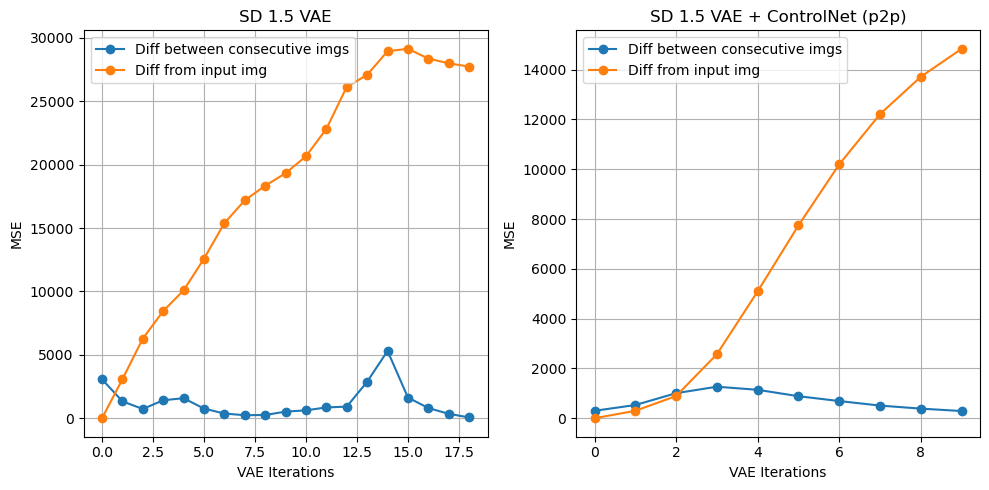

In [96]:
plt.figure(figsize=(10, 5))

# Plotting MSE - baked VAE
plt.subplot(1, 2, 1)
plt.plot(mse_consecutive, '-o', label='Diff between consecutive imgs')
plt.plot(mse_accumulated, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE')
plt.xlabel('VAE Iterations')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

# Plotting MSE - baked VAE + controlnet(p2p)
plt.subplot(1, 2, 2)
plt.plot(mse_consecutive_cn, '-o', label='Diff between consecutive imgs')
plt.plot(mse_accumulated_cn, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE + ControlNet (p2p)')
plt.xlabel('VAE Iterations')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

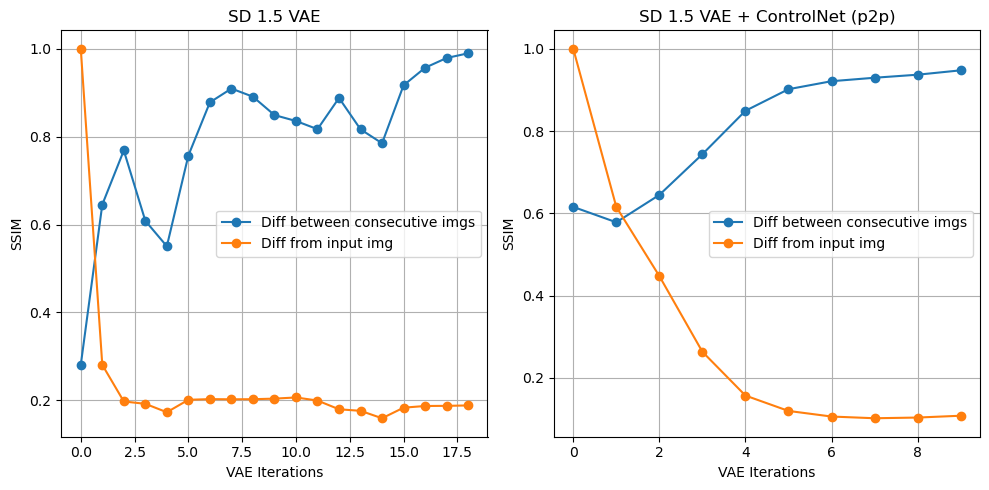

In [97]:
plt.figure(figsize=(10, 5))

# Plotting SSIM
plt.subplot(1, 2, 1)
plt.plot(ssim_consecutive, '-o', label='Diff between consecutive imgs')
plt.plot(ssim_accumulated, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE')
plt.xlabel('VAE Iterations')
plt.ylabel('SSIM')
plt.grid(True)
plt.legend()

# Plotting SSIM
plt.subplot(1, 2, 2)
plt.plot(ssim_consecutive_cn, '-o', label='Diff between consecutive imgs')
plt.plot(ssim_accumulated_cn, '-o', label='Diff from input img')
plt.title('SD 1.5 VAE + ControlNet (p2p)')
plt.xlabel('VAE Iterations')
plt.ylabel('SSIM')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [98]:
def calculate_metrics(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    mse_values = []
    ssim_values = []
    labels = []

    for subfolder in subfolders:
        files = os.listdir(subfolder)
        images = [imread(os.path.join(subfolder, f)) for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]
        images_gray = [rgb2gray(img) for img in images]
        mse_sub = []
        ssim_sub = []

        # Assuming images are pairwise for simplicity
        for i in range(0, len(images_gray), 2):
            mse_score = mean_squared_error(images_gray[i], images_gray[i+1])
            ssim_score = structural_similarity(images_gray[i], images_gray[i+1], data_range=images_gray[i+1].max() - images_gray[i+1].min())
            mse_sub.append(mse_score)
            ssim_sub.append(ssim_score)

        mse_values.append(np.mean(mse_sub))
        ssim_values.append(np.mean(ssim_sub))
        labels.append(os.path.basename(subfolder))

    return mse_values, ssim_values, labels


In [99]:
def plot_metrics_with_colors_and_annotations(mse_values, ssim_values, labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    combined_mse = sorted(zip(labels, mse_values), key=lambda x: x[1])
    combined_ssim = sorted(zip(labels, ssim_values), key=lambda x: x[1])
    
    # Unpack the sorted and combined values
    sorted_labels_mse, sorted_mse_values = zip(*combined_mse)
    sorted_labels_ssim, sorted_ssim_values = zip(*combined_ssim)

    # Generate a color map based on sorted values
    cmap = plt.cm.viridis
    norm_mse = plt.Normalize(min(sorted_mse_values), max(sorted_mse_values))
    norm_ssim = plt.Normalize(min(sorted_ssim_values), max(sorted_ssim_values))

    # Create an index for each tick position
    x = np.arange(len(labels))

    # Plot MSE values on the first subplot
    mse_colors = cmap(norm_mse(sorted_mse_values))
    bars_mse = ax1.bar(x, sorted_mse_values, color=mse_colors)
    ax1.set_title('Mean Squared Error by ControlNet Models (Lower is better)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(sorted_labels_mse, rotation=45)
    ax1.set_ylabel('MSE Scores')
    # ax1.set_xlabel('Models')
    # ax1.axhline(y=np.min(sorted_mse_values), color='r', linestyle='-', label='Mean MSE')

    # Annotate MSE subplot with performance hint
    # ax1.text(0.5, np.mean(sorted_mse_values), 'Lower is better', ha='center', va='bottom', color='r')

    # Plot SSIM values on the second subplot
    ssim_colors = cmap(norm_ssim(sorted_ssim_values))
    bars_ssim = ax2.bar(x, sorted_ssim_values, color=ssim_colors)
    ax2.set_title('Structural Similarity Index by ControlNet Models (Higher is better)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(sorted_labels_ssim, rotation=45)
    ax2.set_ylabel('SSIM Scores')
    # ax2.set_xlabel('Models')
    # ax2.axhline(y=np.max(sorted_ssim_values), color='g', linestyle='-', label='Mean SSIM')

    # Annotate SSIM subplot with performance hint
    # ax2.text(0.5, np.mean(sorted_ssim_values), 'Higher is better', ha='center', va='bottom', color='g')

    # Add legends
    # ax1.legend()
    # ax2.legend()

    # Tight layout to adjust subplots
    fig.tight_layout()

    # Show plot
    plt.show()

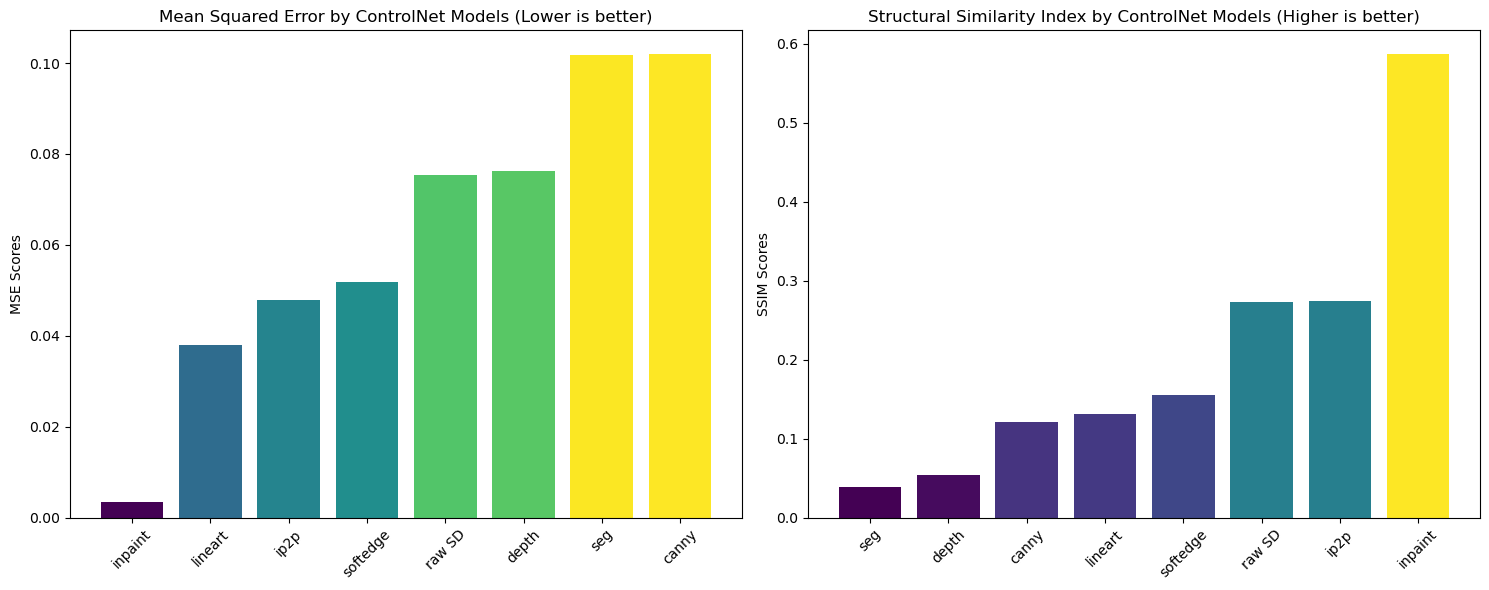

In [100]:
folder_path = 'samples/'
mse_values, ssim_values, labels = calculate_metrics(folder_path)
plot_metrics_with_colors_and_annotations(mse_values, ssim_values, labels)


Compare avg perceped time with actual time in all groups

In [190]:
def convert_seconds_to_minutes(time_str):
    try:
        if pd.isna(time_str):
            return None 
        elif ':' not in time_str:
            return float(time_str)
        minutes, seconds = map(int, time_str.split(':'))
        result = minutes + seconds / 60
        # print('Converted:', time_str, 'to', result)
        return result
    except Exception as e:
        print('ERROR: ' + time_str, e)     

In [191]:
csv_file_path = 'LACE-Responses.csv'
df = pd.read_csv(csv_file_path)
col_name_index_pairs = {name: index for index, name in enumerate(df.columns)}

In [192]:
cols_to_convert = [
    'How many minutes do you think Task 1 took to complete?',
    'How many minutes do you think Task 2 took to complete?',
    'How many minutes do you think Task 3 took to complete?'
]

# Direct conversion for already numeric 'minutes' fields
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Applying conversion for actual time cols which are in 'MM:SS' format
time_cols = ['Task 1 - Time', 'Task 2 - Time', 'Task 3 - Time']
for col in time_cols:
    df[col] = df[col].apply(convert_seconds_to_minutes)

In [193]:
col_name_index_pairs

{'Major': 0,
 'How many years of experience do you have using Photoshop?': 1,
 'Do you have experience in art or digital art?': 2,
 'Do you have a background in computer science?': 3,
 'Do you have experience with generative AI products, such as Midjourney, DALL-E, or Stable Diffusion?': 4,
 'Which prompt did you receive?': 5,
 'How many minutes do you think Task 1 took to complete?': 6,
 'How satisfied are you with the final result?': 7,
 'How much do you feel a sense of ownership over the final result?': 8,
 'To what extent does the final output diverge from your initial expectations?': 9,
 'How would you rate the explainability of the tool (workflow) provided?': 10,
 'How would you rate the usability of the tool (workflow) provided to complete the task?': 11,
 "Would you consider the final output to be 'Art'?": 12,
 'How many minutes do you think Task 2 took to complete?': 13,
 'How satisfied are you with the final result?.1': 14,
 'How much do you feel a sense of ownership over the

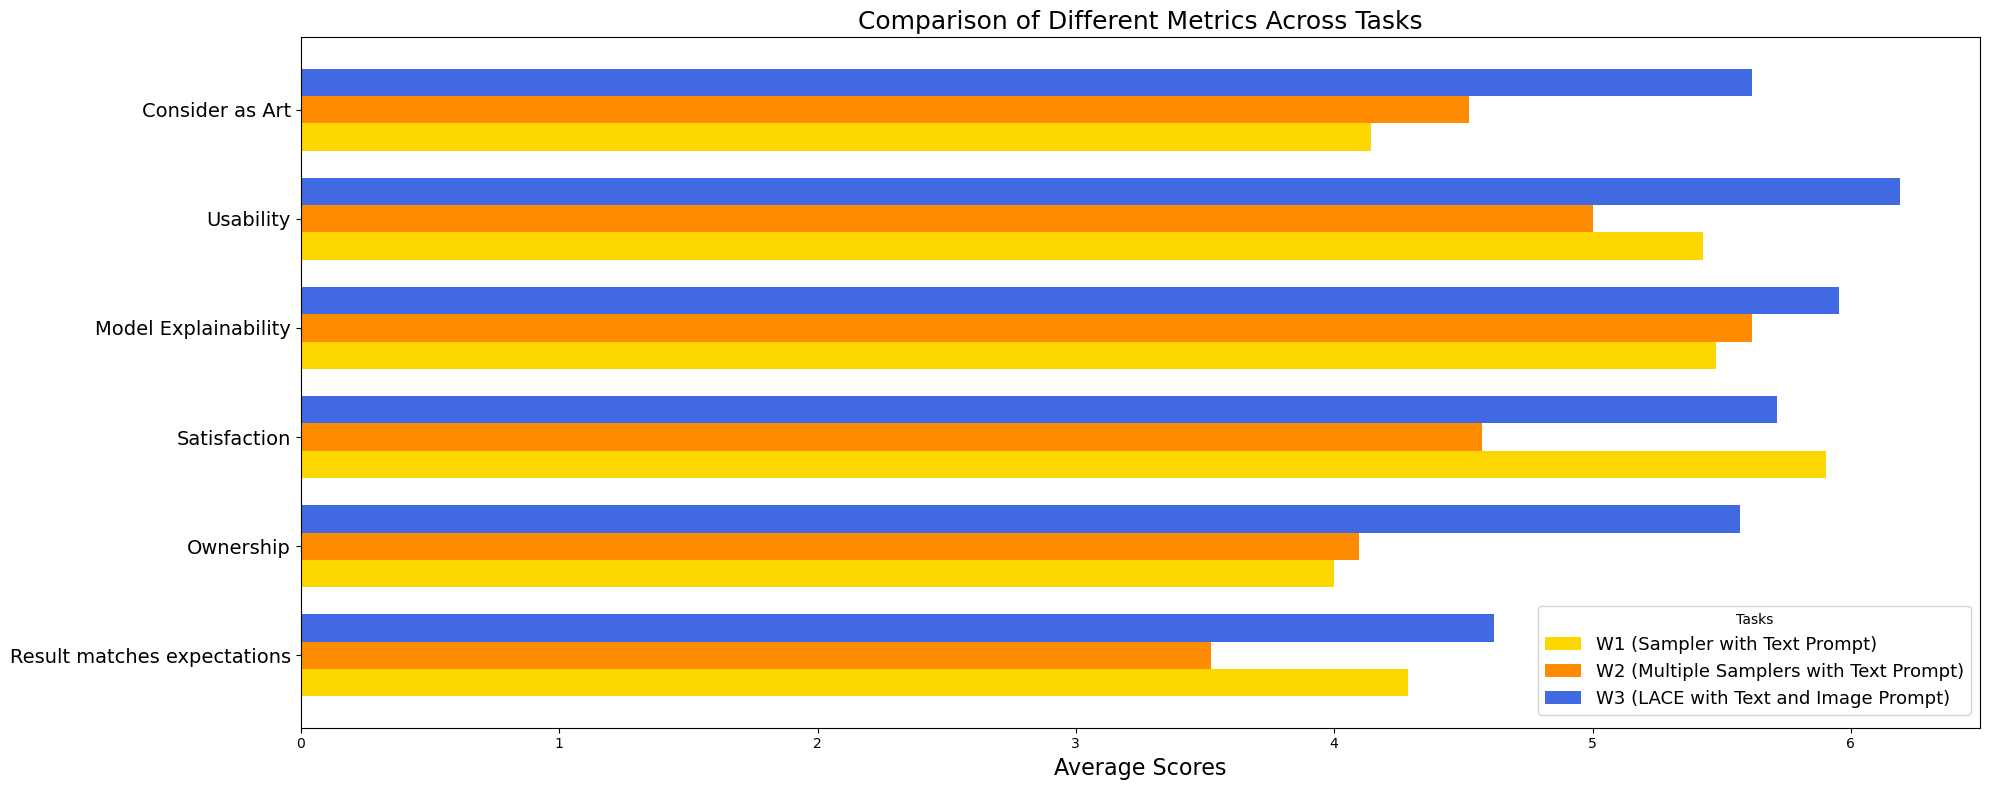

In [368]:
import matplotlib.pyplot as plt
import numpy as np

tasks = ['W1 (Sampler with Text Prompt)', 'W2 (Multiple Samplers with Text Prompt)', 'W3 (LACE with Text and Image Prompt)']
t1_satisfied_df = df.iloc[:,7]
t2_satisfied_df = df.iloc[:,14]
t3_satisfied_df = df.iloc[:,21]
t1_ownership_df = df.iloc[:,8]
t2_ownership_df = df.iloc[:,15]
t3_ownership_df = df.iloc[:,22]
t1_divergence_df = df.iloc[:,9]
t2_divergence_df = df.iloc[:,16]
t3_divergence_df = df.iloc[:,23]
t1_explainability_df = df.iloc[:,10]
t2_explainability_df = df.iloc[:,17]
t3_explainability_df = df.iloc[:,24]
t1_usability_df = df.iloc[:,11]
t2_usability_df = df.iloc[:,18]
t3_usability_df = df.iloc[:,25]
t1_art_df = df.iloc[:,12]
t2_art_df = df.iloc[:,19]
t3_art_df = df.iloc[:,26]

t1_df = [t1_divergence_df.mean(), t1_ownership_df.mean(), t1_satisfied_df.mean(), t1_explainability_df.mean(), t1_usability_df.mean(), t1_art_df.mean()]
t2_df = [t2_divergence_df.mean(), t2_ownership_df.mean(), t2_satisfied_df.mean(), t2_explainability_df.mean(), t2_usability_df.mean(), t2_art_df.mean()]
t3_df = [t3_divergence_df.mean(), t3_ownership_df.mean(), t3_satisfied_df.mean(), t3_explainability_df.mean(), t3_usability_df.mean(), t3_art_df.mean()]

# Define the positions for the groups
metrics = ['Result matches expectations', 'Ownership', 'Satisfaction', 'Model Explainability', 'Usability', 'Consider as Art']
averages = [t1_df, t2_df, t3_df]
colors = ['gold', 'darkorange', 'royalblue']

# Define the positions for the tasks
task_positions = np.arange(len(metrics))

# Set the width of each bar
bar_width = 0.25  # Adjust width to fit your style

# Create a plot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot horizontal bars for each task
for i, (task, avg, color) in enumerate(zip(tasks, averages, colors)):
    offset = (i - len(tasks) / 2) * bar_width + bar_width / 2
    ax.barh(task_positions + offset, avg, height=bar_width, label=task, color=color)

# Set the y-labels, title, and legend
ax.set_yticks(task_positions)
ax.set_yticklabels(metrics, fontsize=14)
ax.set_xlabel('Average Scores', fontsize=16)
ax.set_title('Comparison of Different Metrics Across Tasks', fontsize=18)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.19), title='Tasks', fontsize=13)

plt.tight_layout()
plt.show()

Ownership by prompt

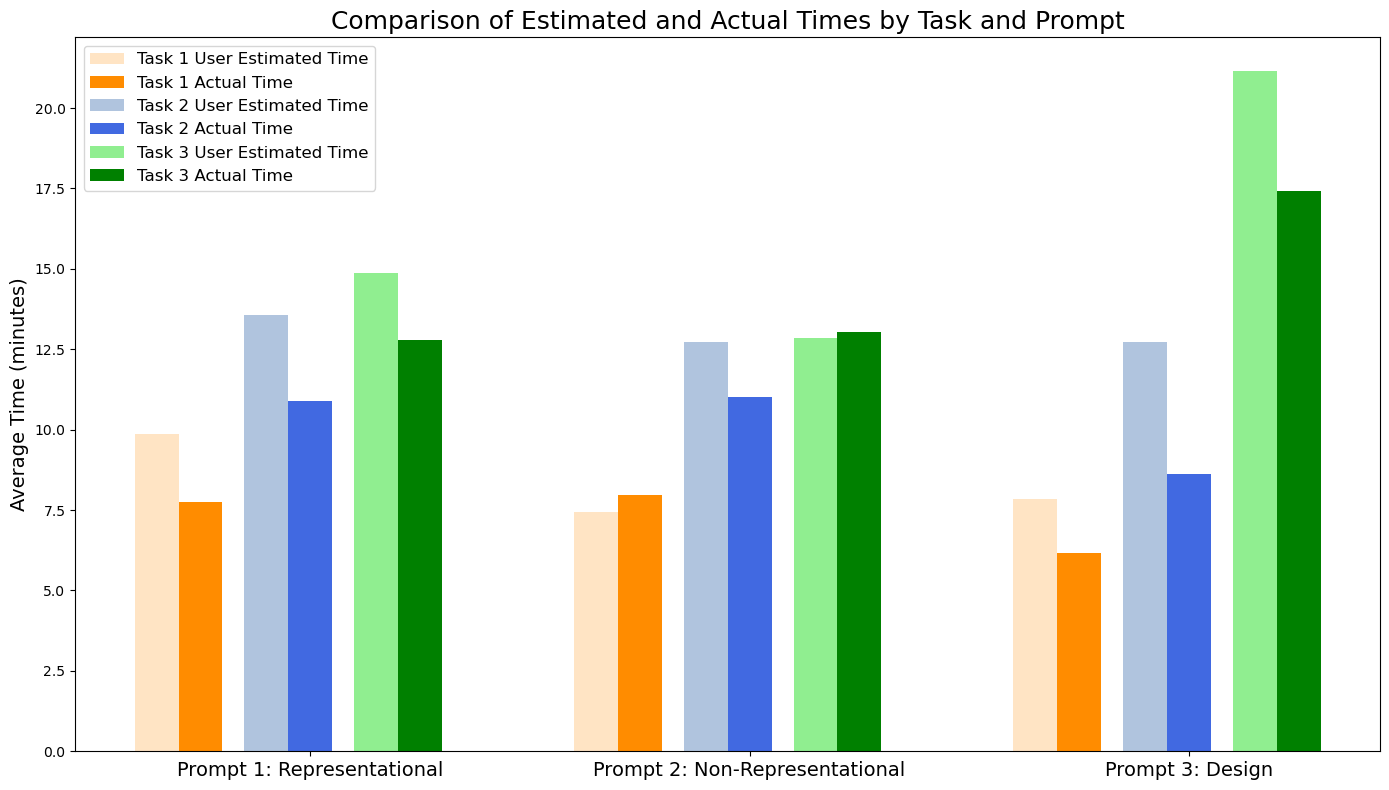

In [194]:

estimate_cols = [
    'How many minutes do you think Task 1 took to complete?',
    'How many minutes do you think Task 2 took to complete?',
    'How many minutes do you think Task 3 took to complete?'
]
for col in estimate_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Group data by the prompt
import pandas as pd
import matplotlib.pyplot as plt

grouped = df.groupby('Which prompt did you receive?')

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 8))

tasks = ['Task 1', 'Task 2', 'Task 3']
colors_estimated = ['bisque', 'lightsteelblue', 'lightgreen']  # Colors for estimated times of each task
colors_actual = ['darkorange', 'royalblue', 'green']  # Colors for actual times of each task
bar_width = 0.1  # Width of the bars
space_between_groups = 0.05  # Space between groups

# Plot data for each task
for i, (prompt, group) in enumerate(grouped):
    # Calculate positions for each bar within the group
    positions = [i - bar_width, i, i + bar_width]

    for j, task in enumerate(tasks):
        # Offset position for the group
        pos_offset = j * (bar_width * 2 + space_between_groups)

        # Calculate the average estimated and actual times for each task within the prompt
        avg_estimated_time = group[f'How many minutes do you think {task} took to complete?'].mean()
        avg_actual_time = group[f'{task} - Time'].mean()

        # Plot the estimated time bar
        ax.bar(pos_offset + positions[0], avg_estimated_time, width=bar_width, color=colors_estimated[j],
               label=f'{task} User Estimated Time' if i == 0 else "")

        # Plot the actual time bar
        ax.bar(pos_offset + positions[1], avg_actual_time, width=bar_width, color=colors_actual[j],
               label=f'{task} Actual Time' if i == 0 else "")

# Set the chart's titles and labels
ax.set_title('Comparison of Estimated and Actual Times by Task and Prompt', fontsize=18)
# ax.set_xlabel('Prompts')
ax.set_ylabel('Average Time (minutes)', fontsize=14)

# Set the positions and labels for the x-ticks
prompt_positions = [p + (len(tasks) - 1) * (bar_width * 2 + space_between_groups) / 2 for p in range(len(grouped))]
ax.set_xticks(prompt_positions)
ax.set_xticklabels(grouped.groups.keys(), fontsize=14)

# Display the legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels/handles
ax.legend(by_label.values(), by_label.keys(), fontsize=12)

plt.tight_layout()  # Adjust layout to fit all
plt.show()


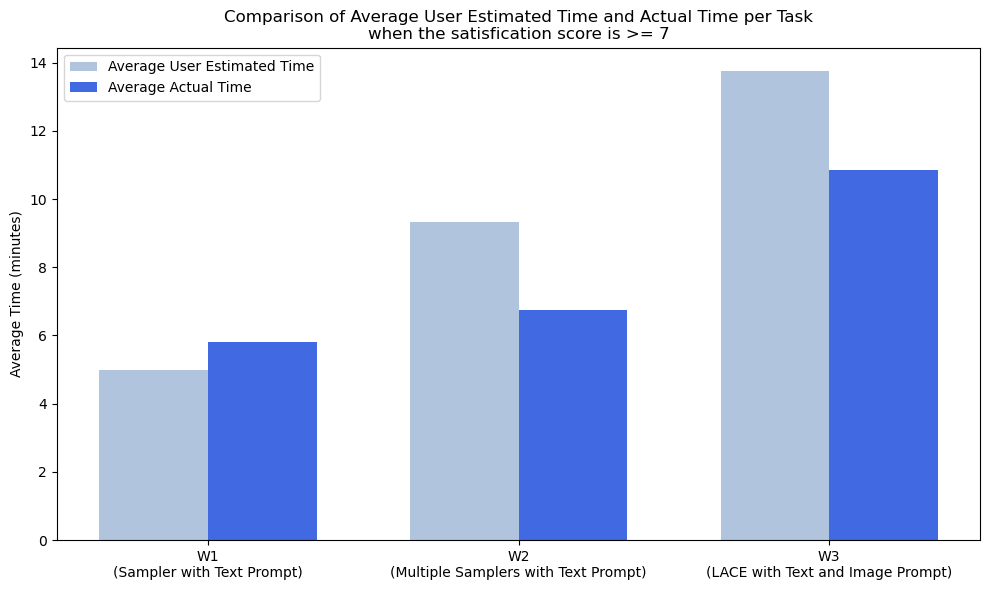

In [227]:
tasks =  ['W1\n(Sampler with Text Prompt)', 'W2\n(Multiple Samplers with Text Prompt)', 'W3\n(LACE with Text and Image Prompt)']

satisfied_scores = [5,6,7]

t1_satisfied_df = df[df.iloc[:,7] >= satisfied_scores]
t2_satisfied_df = df[df.iloc[:,14] >= satisfied_scores]
t3_satisfied_df = df[df.iloc[:,21] >= satisfied_scores]

dissatisfied_df = df[df['How satisfied are you with the final result?'] <= 3]


t1_user_time = t1_satisfied_df['How many minutes do you think Task 1 took to complete?']
t2_user_time = t2_satisfied_df['How many minutes do you think Task 2 took to complete?']
t3_user_time = t3_satisfied_df['How many minutes do you think Task 3 took to complete?']
t1_actual_time = t1_satisfied_df['Task 1 - Time']
t2_actual_time = t2_satisfied_df['Task 2 - Time']
t3_actual_time = t3_satisfied_df['Task 3 - Time']

avg_user_time = [t1_user_time.mean(), t2_user_time.mean(), t3_user_time.mean()]
avg_actual_time = [t1_actual_time.mean(), t2_actual_time.mean(), t3_actual_time.mean()]


# Define the positions for the groups and the width of each bar
positions = np.arange(len(tasks))
bar_width = 0.35

# Plot the bars side by side
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for average user time
ax.bar(positions - bar_width/2, avg_user_time, bar_width, label='Average User Estimated Time', color='lightsteelblue')

# Plot the bars for average actual time
ax.bar(positions + bar_width/2, avg_actual_time, bar_width, label='Average Actual Time', color='royalblue')

# Set the labels and title
# ax.set_xlabel('Tasks')
ax.set_ylabel('Average Time (minutes)', color='black')
ax.set_title(f'Comparison of Average User Estimated Time and Actual Time per Task\nwhen the satisfication score is >= {satisfied_scores}')
ax.set_xticks(positions)
ax.set_xticklabels(tasks)

# Show the legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.show()


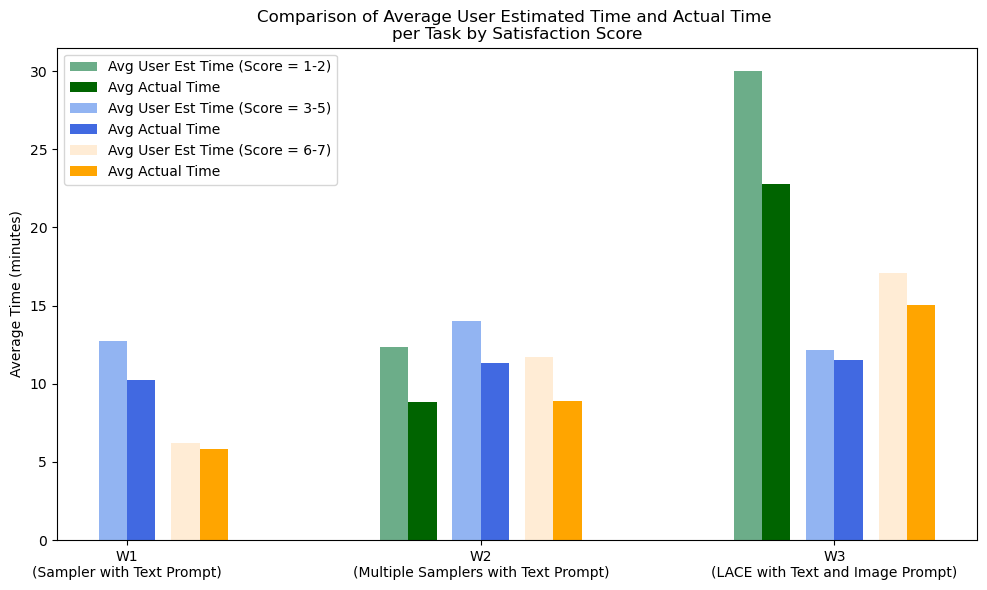

In [299]:
tasks = ['W1\n(Sampler with Text Prompt)', 'W2\n(Multiple Samplers with Text Prompt)', 'W3\n(LACE with Text and Image Prompt)']
satisfaction_intervals = [(1,2), (3,5), (6,7)]    # score intervals for each task

# Positions and bar width for plotting
positions = np.arange(len(tasks))
bar_width = 0.08

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors_est = ['seagreen', 'cornflowerblue', 'bisque']
colors_act = ['darkgreen', 'royalblue', 'orange']

for i, (lower, upper) in enumerate(satisfaction_intervals):
    # Filter dataframe for each task where satisfaction is greater than or equal to the score
    t1_satisfied_df = df[df.iloc[:, 7].between(lower, upper)]
    t2_satisfied_df = df[df.iloc[:, 14].between(lower, upper)]
    t3_satisfied_df = df[df.iloc[:, 21].between(lower, upper)]
    
    # Calculate average estimated times
    avg_user_time = [
        t1_satisfied_df['How many minutes do you think Task 1 took to complete?'].mean(),
        t2_satisfied_df['How many minutes do you think Task 2 took to complete?'].mean(),
        t3_satisfied_df['How many minutes do you think Task 3 took to complete?'].mean()
    ]
    
    # Calculate average actual times
    avg_actual_time = [
        t1_satisfied_df['Task 1 - Time'].mean(),
        t2_satisfied_df['Task 2 - Time'].mean(),
        t3_satisfied_df['Task 3 - Time'].mean()
    ]
    
    # Offset positions for each group based on the satisfaction score
    pos_offset = (bar_width + 0.125) * i

    # Plot the bars for average estimated time and actual time
    ax.bar(positions - bar_width/2 + pos_offset, avg_user_time, bar_width, label=f'Avg User Est Time (Score = {lower}-{upper})', color=colors_est[i], alpha=0.7)
    ax.bar(positions + bar_width/2 + pos_offset, avg_actual_time, bar_width, label=f'Avg Actual Time', color=colors_act[i], alpha=1)  # Lower zorder for lower scores


# Set the labels and title
ax.set_ylabel('Average Time (minutes)', color='black')
ax.set_title('Comparison of Average User Estimated Time and Actual Time \nper Task by Satisfaction Score')
ax.set_xticks(positions + pos_offset/2)  # Center the x-ticks between the groups of bars
ax.set_xticklabels(tasks)

# Show the legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.show()

time conparision based on ownership

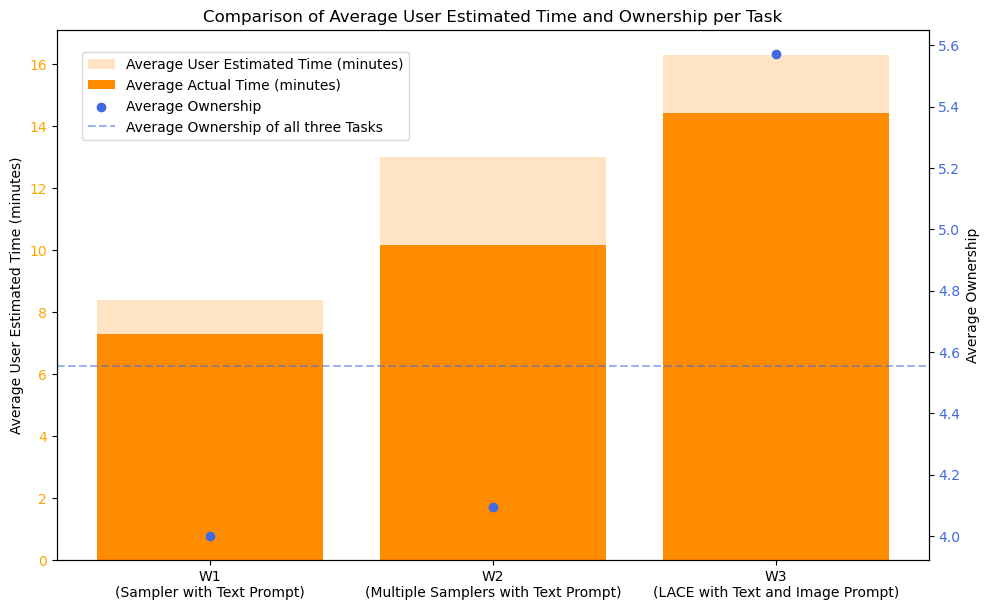

In [248]:
tasks =  ['W1\n(Sampler with Text Prompt)', 'W2\n(Multiple Samplers with Text Prompt)', 'W3\n(LACE with Text and Image Prompt)']


t1_user_time = df['How many minutes do you think Task 1 took to complete?']
t2_user_time = df['How many minutes do you think Task 2 took to complete?']
t3_user_time = df['How many minutes do you think Task 3 took to complete?']

avg_user_time = [t1_user_time.mean(), t2_user_time.mean(), t3_user_time.mean()]
avg_actual_time = [df['Task 1 - Time'].mean(), df['Task 2 - Time'].mean(), df['Task 3 - Time'].mean()]


avg_t1_ownership = df.iloc[:,8].mean()
avg_t2_ownership = df.iloc[:,15].mean()
avg_t3_ownership = df.iloc[:,22].mean()

ownership_averages = [avg_t1_ownership, avg_t2_ownership, avg_t3_ownership]
mean_of_ownerships = np.mean(ownership_averages)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create bar chart for average times

ax1.bar(tasks, avg_user_time, color='bisque', label='Average User Estimated Time (minutes)')
ax1.bar(tasks, avg_actual_time, color='darkorange', label='Average Actual Time (minutes)')
# ax1.set_xlabel('Tasks')
ax1.set_ylabel('Average User Estimated Time (minutes)', color='black')
ax1.tick_params(axis='y', labelcolor='orange')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Average Ownership', color='black')  # we already handled the x-label with ax1
ax2.scatter(tasks, ownership_averages, color='royalblue', label='Average Ownership')
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.axhline(mean_of_ownerships, color='royalblue', alpha=0.5, linestyle='--', label='Average Ownership of all three Tasks')


# Show legends
fig.legend(loc='upper left',  bbox_to_anchor=(0.08, 0.95))
fig.tight_layout()
plt.title('Comparison of Average User Estimated Time and Ownership per Task')
plt.show()
